In [1]:
# 西瓜書 p.198
import numpy as np

In [2]:
# distant fn
class Dist:   
    def Minkowski(x1, x2, p=2):
        """
        x1, x2 can be a scalar or a matrix
        p is an integer
        return a scalar
        """
        return np.sum(np.abs(x1-x2)**p)**float(1/p)
        
    def Euclidean(x1, x2):
        return Dist.Minkowski(x1, x2, p=2)
    
    def Manhattan(x1, x2):
        return Dist.Minkowski(x1, x2, p=1)
    

# Use k-Means to cluster IRIS dataset

In [3]:
from sklearn.datasets import load_iris

## Load Data

In [4]:
d = load_iris()

In [5]:
d.data.shape

(150, 4)

In [6]:
d.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Sample Data

In [7]:
idx = list(range(5))+list(range(50,55))+list(range(100,105))
d_data = d.data[idx,2:] # only select 15 samples and two features 
d_target = d.target[idx]
d_target # choose 5 from each class 

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

## Cluster Algorithm

In [8]:
def kMeans(data, k=3, max_iter=100, tol=1e-20, diff_type='max', loss = Dist.Euclidean):
    """
    k: number of group
    max_iter: max allowed number of iteration
    tol: under this tolerance, regard the differences are the same
    diff_type:  'max': max_diff or 'mean': mean_diff is restricted within tol
    """
    N = data.shape[0]
    idx = np.random.choice(N,k,replace=False) 
    print ('k-Means: k={}, max_iter: {}, tol:{}, starting_points={}'   \
           .format(k, max_iter, tol, idx ))
    m = data[idx].copy()
    m_new = m.copy() #initial value
    it = 0 #initial
    C = None #initial
    boo = True
    while ( boo ):
        m = m_new.copy() 
        C = [set({}) for i in range(k)] # empty set for each class
        for j in range(N): # each sample
            x_j = data[j] 
            d_ji = [loss(x_j,m[i]) for i in range(k)] # distant to each class
            lambda_j = np.argmin(d_ji) # assign to which class
            C[lambda_j].add(j) # assign j to the class
        diff = []
        for i in range(k):
            _m_new = np.mean([data[j] for j in C[i]],axis=0)# new m for class i
            _diff = np.abs(_m_new - m[i])
            _diff_ = np.max(_diff) if diff_type=='max' else mean_diff
            diff.append(_diff_)
            if ( _diff_ > tol):
                m_new[i] = _m_new
            else:
                m_new[i] = m[i]
        
        print ('Epoch: {},  C={}'.format(it, C))
        it+=1
        boo = it < max_iter and (m_new != m).any()
    return C

k = 3
C_cluster = kMeans(d_data, k=k, loss=Dist.Euclidean)    

k-Means: k=3, max_iter: 100, tol:1e-20, starting_points=[ 5  1 12]
Epoch: 0,  C=[{5, 6, 7, 8, 9, 11}, {0, 1, 2, 3, 4}, {10, 12, 13, 14}]
Epoch: 1,  C=[{5, 6, 7, 8, 9, 11}, {0, 1, 2, 3, 4}, {10, 12, 13, 14}]


In [9]:
default_C = np.array_split(range(15),3)

In [10]:
C_ref = []
for i in range(k):
    c = np.zeros(shape=k)
    for j in C_cluster[i]:
        c[d_target[j]] += 1
    L = np.argmax(c)
    C_ref.append(set(default_C[L]) )
C_ref

[{5, 6, 7, 8, 9}, {0, 1, 2, 3, 4}, {10, 11, 12, 13, 14}]

# Calculate index

In [11]:
# external index
class ExtIn_fns: 
    
    fns_list = [ 'Jaccard', 'FM', 'RI' ]
    def build_L_from_C(C_set_list, m):
        assert len(C_set_list) <= m
        L_list = list(range(m))
        for Label, C_set in enumerate(C_set_list): 
            for i in C_set:
                L_list[i] = Label  
        return L_list

    def cal_abcd(D, C_cluster, C_ref):
        m = D.shape[0]
        #k, s = len(C_cluster), len(C_ref)
        L_cluster, L_ref = ExtIn_fns.build_L_from_C(C_cluster,m), ExtIn_fns.build_L_from_C(C_ref,m)
        a, b, c, d = 0, 0, 0, 0
        for i in range(m):
            #x_i = D[i]
            l_i_cls = L_cluster[i]
            l_i_ref = L_ref[i]
            for j in range(i+1, m):
                #x_j = D[j]
                l_j_cls = L_cluster[j]
                l_j_ref = L_ref[j]
                if l_i_cls == l_j_cls:
                    if l_i_ref == l_j_ref:
                        a += 1
                    else: 
                        b += 1
                else:
                    if l_i_ref == l_j_ref:
                        c += 1
                    else: 
                        d += 1
        assert a+b+c+d == m*(m-1)/2
        return a,b,c,d

    def Jaccard(a,b,c,d):
        assert a+b+c > 0
        return float(a)/(a+b+c)

    def FM(a,b,c,d):
        assert a+b > 0 and a+c > 0
        return np.sqrt(float(a)/(a+b)*float(a)/(a+c)) 

    def RI(a,b,c,d):
        assert a+b+c+d > 0
        return 2*float(a+d)/((a+b+c+d)*2) # (a+b+c+d)*2 == m*(m-1)

class ExternalIndex():
    
    score = {}
    fns = ExtIn_fns
    
    def __init__(self, D, C_cluster, C_ref, index='all'):
        """
        D = {x_1, x_2, ..., x_m}
        C_cluster = [ C_1 = set({...}), ..., C_k = set({...}) ]
        C_ref = [ C_1* = set({...}), ..., C_s* = set({...}) ]
        L_cluster = [ l_1 , l_2 , ...., l_m ]
        L_ref = [ l_1 , l_2 , ...., l_m ]
        """
        if hasattr(self.fns, index):
            fn = getattr(self.fns, index)
            score = self.cal_score(D, C_cluster, C_ref, fn)
            self.score.update({ index : score })
        elif index=='all':
            for index_name in self.fns.fns_list:
                fn = getattr(self.fns, index_name)
                score = self.cal_score(D, C_cluster, C_ref, fn)
                self.score.update({ index_name : score })                
        else:
            print("No this fn [%s] !!" % index)
        return
            
    def cal_score(self, D, C_cluster, C_ref, fn):
        a,b,c,d = self.fns.cal_abcd(D, C_cluster, C_ref)
        return fn(a,b,c,d) 
        
    def __print__(self):
        for index_name in self.fns.fns_list:
            print("{} score = {:.2f}".format(index_name, self.score[index_name]))
    

In [12]:
exi = ExternalIndex(d_data, C_cluster, C_ref)
exi.__print__()

Jaccard score = 0.74
FM score = 0.85
RI score = 0.91


In [13]:
# internal index
class IntIn_fns: 
    
    fns_list = [ 'DBI', 'DI' ]
    def avgC(D, C, dist_fn):
        """
        the avg dist in cluster C
        C = set({ ... })
        """
        assert type(D) == np.ndarray or type(D) == list
        #m = D.shape[0]
        assert type(C) == set or type(C) == list 
        n = len(C)
        assert n > 1
        C_list = list(C) # 'set' to 'list' for iteration
        sum_dist = 0
        for i in range(n):
            for j in range(i+1,n):
                #print(i, j )
                #print(C_list[i],C_list[j] )
                #print(D[C_list[i]],D[C_list[j]] )
                sum_dist += dist_fn(D[C_list[i]],D[C_list[j]])  
        return float(2)/n/(n-1)*sum_dist
    
    def diamC(D, C, dist_fn):  
        """
        the max dist in cluster C
        C = set({ ... })
        """
        assert type(D) == np.ndarray or type(D) == list
        #m = D.shape[0]
        assert type(C) == set or type(C) == list
        n = len(C)
        assert n > 1
        C_list = list(C) # 'set' to 'list' for iteration
        max_dist = 0
        for i in range(n):
            for j in range(i+1,n):
                dist = dist_fn(D[C_list[i]],D[C_list[j]]) 
                if (dist>max_dist):
                    max_dist = dist  
        return max_dist 
    
    def d_min(D, C_i, C_j, dist_fn):  
        """
        the min dist between cluster C_i and C_j
        C_i = set({ ... })
        """
        assert type(D) == np.ndarray or type(D) == list
        #m = D.shape[0]
        assert type(C_i) == set or type(C_i) == list
        assert type(C_j) == set or type(C_j) == list
        n_i, n_j = len(C_i) , len(C_j)
        C_i_list, C_j_list = list(C_i), list(C_j) # 'set' to 'list' for iteration
        min_dist = np.inf
        for i in range(n_i):
            for j in range(n_j):
                dist = dist_fn(D[C_i_list[i]],D[C_j_list[j]]) 
                if (dist<min_dist):
                    min_dist = dist  
        return min_dist 
    
    def d_cen(D, C_i, C_j, dist_fn):  
        """
        the dist between mean of cluster C_i and mean ofC_j
        C_i = set({ ... })
        """
        assert type(D) == np.ndarray or type(D) == list
        #m = D.shape[0]
        assert type(C_i) == set or type(C_i) == list
        assert type(C_j) == set or type(C_j) == list
        #n_i, n_j = len(C_i) , len(C_j)
        C_i_list, C_j_list = list(C_i), list(C_j) # 'set' to 'list' 
        #print(C_i_list, C_j_list)
        mu_i = np.mean( D[C_i_list], axis=0)
        mu_j = np.mean( D[C_j_list], axis=0)
        #print(mu_i, mu_j)
        return dist_fn(mu_i, mu_j)   

    def DBI(D, C_cluster, dist_fn): # smaller is better
        m = D.shape[0]
        k = len(C_cluster)
        assert k > 0 and m >= k
        sum_max = 0
        for i in range(k):
            max_ = 0
            for j in range(k): 
                if  j != i: 
                    a = IntIn_fns.avgC(D, C_cluster[i], dist_fn)
                    b = IntIn_fns.avgC(D, C_cluster[j], dist_fn)
                    c = IntIn_fns.d_cen(D, C_cluster[i], C_cluster[j], dist_fn)
                    assert c > 0
                    ind = (a+b)/c
                    if  ind > max_:
                        max_ = ind
            sum_max += max_
        return float(sum_max)/float(k) 
                    
    def DI(D, C_cluster, dist_fn): # larger is better
        m = D.shape[0]
        k = len(C_cluster)
        assert k > 0 and m >= k
        min_ = np.inf 
        for i in range(k):
            _min_ = np.inf
            for j in range(k): 
                if  j != i: 
                    a = IntIn_fns.d_min(D, C_cluster[i], C_cluster[j], dist_fn)
                    _max_ = 0
                    for l in range(k):
                        v = IntIn_fns.diamC(D, C_cluster[l], dist_fn)
                        if v > _max_:
                            _max_ = v
                    assert _max_ > 0
                    vv = float(a)/float(_max_)
                    if vv < _min_:
                        _min_ = vv
            assert _min_ < np.inf
            if _min_ < min_ :
                min_ = _min_
        assert min_ < np.inf
        return float(min_)
    
class InternalIndex():
    
    score = {}
    fns = IntIn_fns
    
    def __init__(self, D, C_cluster, dist_fn=Dist.Euclidean, index='all'):
        """
        D = {x_1, x_2, ..., x_m}
        C_cluster = [ C_1 = set({...}), ..., C_k = set({...}) ]
        L_cluster = [ l_1 , l_2 , ...., l_m ]
        """
        if hasattr(self.fns, index):
            fn = getattr(self.fns, index)
            score = self.cal_score(D, C_cluster, dist_fn, fn)
            self.score.update({ index : score })
        elif index=='all':
            for index_name in self.fns.fns_list:
                fn = getattr(self.fns, index_name)
                score = self.cal_score(D, C_cluster, dist_fn, fn)
                self.score.update({ index_name : score })                
        else:
            print("No this fn [%s] !!" % index)
        return
            
    def cal_score(self, D, C_cluster, dist_fn, fn):
        return fn(D, C_cluster, dist_fn)
        
    def __print__(self):
        for index_name in self.fns.fns_list:
            print("{} score = {:.2f}".format(index_name, self.score[index_name]))            
    


In [14]:
ini = InternalIndex(d_data, C_cluster)
ini.__print__()

DBI score = 0.53
DI score = 0.41


## Plot

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
c_ = ['r', 'g', 'b']
l_ = ['group_{}'.format(i+1) for i in range(3)]

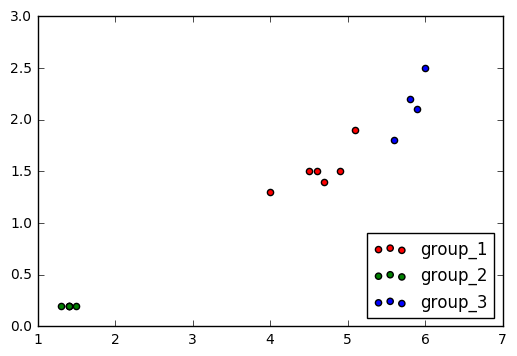

In [17]:
for i,g in enumerate(C_cluster):
    plt.scatter(*zip(*d_data[list(g)]), c=c_[i],label=l_[i])
    plt.legend(loc='lower right')